### In this notebook, we have used Decision Tree and Random Forest models for prediction.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/opt/anaconda3/envs/p36_shv_new/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/envs/p36_shv_new/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
data = pd.read_csv('Data/Real-Data/Real_Combine.csv')
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [5]:
data=data.dropna()

In [6]:
X = data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [8]:
model_lr = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [9]:
model_lr.fit(X_train,Y_train)

LinearRegression()

In [12]:
mse = cross_val_score(model_lr,X,Y,cv=5,scoring='neg_mean_squared_error')
mse.mean()

-4632.309383748412

### Ridge and Lasso Regressor algorithms

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV # Since in Ridge and Lasso, we have to calculat the lambda value, we need to calc using hyperparameter tuning

In [14]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,12,15,18,20]}#,30,40,50,60,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   12, 15, 18, 20]},
             scoring='neg_mean_squared_error')

In [15]:
ridge_regressor.best_params_

{'alpha': 20}

In [16]:
ridge_regressor.best_score_

-4625.398256689974

### As seen above, we see that the score or mse has reduced however not to the greater extent

### Let's use the Lasso regressor now

In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [18]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [19]:
lasso_regressor.fit(X,Y)
lasso_regressor.best_params_

/opt/anaconda3/envs/p36_shv_new/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1113878.1415315194, tolerance: 420.8872530976308
  positive)
/opt/anaconda3/envs/p36_shv_new/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1025019.3365900796, tolerance: 380.84829544201204
  positive)
/opt/anaconda3/envs/p36_shv_new/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1176898.7015628405, tolerance: 412.10048997202455
  positive)
/opt/anaconda3/envs/p36_shv_new/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not

{'alpha': 1}

In [20]:
lasso_regressor.best_score_

-4617.130372137594

In [21]:
import pickle

file = 'Lasso_Ridge_Regressor.sav'
pickle.dump(lasso_regressor,open(file,'wb'))

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
dtree = DecisionTreeRegressor(criterion="mse")

In [25]:
dtree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [26]:
dtree.score(X_train,Y_train)

1.0

In [27]:
dtree.score(X_test,Y_test)

-0.4041461970899085

### As we could see from the score above that the model is completely overfitted!!! since the score is 1.0 - signifying no errors

In [28]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtree,X,Y,cv=5)
score.mean()

-0.3445276602077584

## Tree visualization

In [47]:
#!pip install pydotplus
#!pip install graphviz
#!pip install opencv-python

     |████████████████████████████████| 52.4 MB 12.2 MB/s eta 0:00:01


In [53]:
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz
export_graphviz(dtree, 'tree.dot', feature_names = X_train.columns)

#### Use the dot tool in MacOS or maybe even on Linux to convert from .dot format to .png as follows :
dot -Tpng tree.dot -o tree.png

#### Having the tree visualization would be beneficial, if we want to decide on teh Hyper parameters to tune the model accordingly.

If we execute the dot command, we can also see the depth of teh tree, where the MSE =0 and can pickup the previous level of tree and feed the GridSearchCV or any other Hyper parameter model

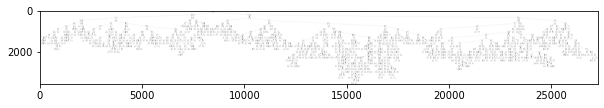

In [56]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
#cv2.imshow('tree.dot')
img = cv2.imread('tree.png')
plt.figure(figsize = (10, 10))
plt.imshow(img)

In [39]:
features = data.columns[:-1]

In [40]:
features

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM'], dtype='object')

### Hyper-parameter Tuning using DTRegressor

In [58]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [60]:
params = {
    "splitter":["best","random"],
    "max_depth":[3,4,5,6,7,8,10,12,15],
    "min_samples_leaf":[1,2,3,4,5],
    "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
    "max_features":["auto","log2","sqrt",None],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
}

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
random_search = GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10)

In [64]:
%%time
random_search.fit(X,Y)

CPU times: user 1min 47s, sys: 2.19 s, total: 1min 49s
Wall time: 2min 51s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [65]:
random_search.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [66]:
random_search.best_score_

-4251.607656109358

In [67]:
y_pred_test = random_searchom_search.predict(X_test)

In [108]:
dtree = DecisionTreeRegressor(max_depth= 6,
 max_features="log2",
 max_leaf_nodes= 40,
 min_samples_leaf= 1,
 min_weight_fraction_leaf= 0.1,
 splitter= 'best')

dtree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=6, max_features='log2', max_leaf_nodes=40,
                      min_weight_fraction_leaf=0.1)

### Model evaluation for Decision Tree Regressor

In [109]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred_test = dtree.predict(X_test)

print("Mean Absoute Error = ",mean_absolute_error(Y_test,y_pred_test))
print("Mean squared Error = ",mean_squared_error(Y_test,y_pred_test))
print("R^2 = ",r2_score(Y_test,y_pred_test))
print("RMSE = ",np.sqrt(mean_squared_error(Y_test,y_pred_test)))

Mean Absoute Error =  49.84920972682803
Mean squared Error =  4666.617233871284
R^2 =  0.2593607576408844
RMSE =  68.31264329442452


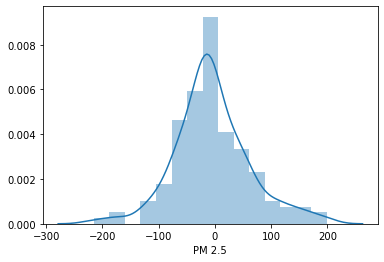

In [70]:
sns.distplot(Y_test-y_pred_test)

In [69]:
file = 'DTree_regressor.sav'
pickle.dump(dtree,open(file,'wb'))

#### More about Hyper parameters can be well understood here :

https://www.youtube.com/watch?v=XABw4Y3GBR4

https://stackoverflow.com/questions/46480457/difference-between-min-samples-split-and-min-samples-leaf-in-sklearn-decisiontre (Diff between min_samples_split and min_samples_leaf explained)

### Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
regressor = RandomForestRegressor(verbose=1)
regressor.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestRegressor(verbose=1)

In [75]:
regressor.score(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.927730344938829

In [76]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,Y,cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [78]:
score.mean()

0.2858343472710949

## Hyperparameter Tuning

In [79]:
RandomForestRegressor()

RandomForestRegressor()

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
#No. of trees in Randome Forest
n_estimators = [int(i) for i in np.linspace(100,1200,12)]

# max_depth : Indicates as how deep the decision tree can grow upto
# - The deeper the tree grows to, higher would be the Overfitting issue
# - However setting it too low, would cause the underfitting
max_depth = [int(x) for x in np.linspace(5,30,6)]

# min_samples_split : Internal node and Leaf nodes
# Internal nodes can be split further, however the Leaf nodes cannot be split further
# Specifies the min number of samples required to split an Internal node
min_samples_split = [2,5,10,15,100]

#min_samples_leaf : Min samples required to be at a leaf node
min_samples_leaf = [1,2,5,10]

#Diff between min_samples_split & min_samples_leaf:
#If Let's say we have min_samples_split=5 and min_samples_leaf=2. Now consider a case, where you reach a node, where there are 7 samples at an Internal node
#Now the split is allowed as the 2 conditions are satisfied. If suppose the split produces two leaf nodes, one with just 1 sample and other with 6 samples,
#Hence this split itself is not allowed, because your second condition, which is min_samples_leaf=2 is not satisfied, because if we split, we see that we get leaf_node=1 and 6, 1 is not allowed.


#max_features :
#Denotes the number of features to consider, when looking for the best split
max_features = ['auto','sqrt']

In [82]:
#create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}


In [83]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [111]:
%%time
rf = RandomForestRegressor()
random_estimator = RandomizedSearchCV(rf,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,n_iter=50)

CPU times: user 245 µs, sys: 1.56 ms, total: 1.81 ms
Wall time: 2.87 ms


In [112]:
%%time
random_estimator.fit(X_train,Y_train)

CPU times: user 3min 38s, sys: 2.66 s, total: 3min 41s
Wall time: 3min 42s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [98]:
random_estimator.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 15}

In [99]:
#100 --> -3484.214
random_estimator.best_score_

-3484.214387843217

### Since we have now derived the best set of prams, let's accomodate them and save the model

In [102]:
regressor = RandomForestRegressor(n_estimators=300,
 min_samples_split=10,
 min_samples_leaf=5,
 max_features="sqrt",
 max_depth=15)
regressor.fit(X_train,Y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=300)

### Model evaluation for Random Forest Regressor (After Hyper Parameter Tuning)

In [107]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred_test = regressor.predict(X_test)

print("Mean Absoute Error = ",mean_absolute_error(Y_test,y_pred_test))
print("Mean squared Error = ",mean_squared_error(Y_test,y_pred_test))
print("R^2 = ",r2_score(Y_test,y_pred_test))
print("RMSE = ",np.sqrt(mean_squared_error(Y_test,y_pred_test)))

Mean Absoute Error =  46.52087357462105
Mean squared Error =  4317.928232249331
R^2 =  0.3147012205581744
RMSE =  65.71094453931804


In [110]:
#Model evaluation for Decision Tree Regressor

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

y_pred_test = dtree.predict(X_test)

print("Mean Absoute Error = ",mean_absolute_error(Y_test,y_pred_test))

print("Mean squared Error = ",mean_squared_error(Y_test,y_pred_test))

print("R^2 = ",r2_score(Y_test,y_pred_test))

print("RMSE = ",np.sqrt(mean_squared_error(Y_test,y_pred_test)))

#Mean Absoute Error =  49.84920972682803
#Mean squared Error =  4666.617233871284
#R^2 =  0.2593607576408844
#RMSE =  68.31264329442452

Mean Absoute Error =  49.84920972682803
Mean squared Error =  4666.617233871284
R^2 =  0.2593607576408844
RMSE =  68.31264329442452


In [103]:
file = 'Random_Forest.sav'
pickle.dump(regressor,open(file,'wb'))